In [157]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [158]:
data = pd.read_csv("data2d.csv")
data

,input,outputx,outputy
0,-6.283185,181.307290,-32.267658
1,-6.273185,197.934269,-35.201388
2,-6.263185,169.278973,-36.276383
3,-6.253185,225.736886,-36.010951
4,-6.243185,230.960018,-34.003974
...,...,...,...
1252,6.236815,267.021407,41.044033
1253,6.246815,261.117094,40.730477
1254,6.256815,261.856840,41.651335
1255,6.266815,274.727379,38.794660


In [159]:
inputvals = data.input
outputvals = data.drop(columns=['input'])

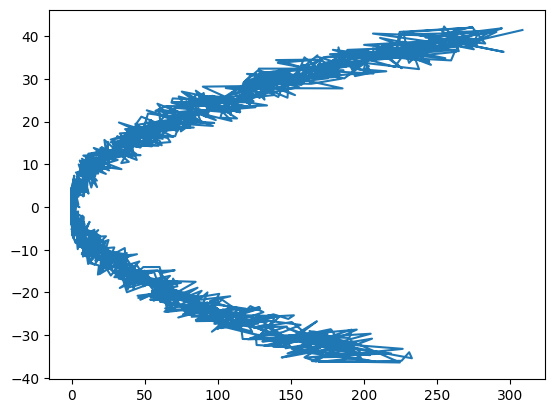

In [160]:
plt.plot(outputvals.outputx,outputvals.outputy)

In [161]:
print(inputvals.shape)
print(outputvals.shape)

(1257,)
(1257, 2)


In [162]:
model = tf.keras.Sequential([
    # tf.keras.layers.Input((2,)),
    tf.keras.layers.Dense(200,activation="leaky_relu"),
    tf.keras.layers.Dense(200,activation="leaky_relu"),
    tf.keras.layers.Dense(100,activation="leaky_relu"),
    tf.keras.layers.Dense(2,activation="leaky_relu"),
    # tf.keras.layers.Softmax()
])

In [163]:
model.compile(
    optimizer = "adam",
    # loss = tf.keras.losses.SparseCategoricalCrossentropy,
    loss = tf.keras.losses.MeanSquaredError,
    metrics = ['accuracy','precision']
)

In [164]:
model.fit(inputvals,outputvals,epochs = 1000)

Epoch 1/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8887 - loss: 5503.7412 - precision: 1.0000
Epoch 2/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9267 - loss: 890.4997 - precision: 1.0000
Epoch 3/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9383 - loss: 497.0833 - precision: 1.0000
Epoch 4/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9308 - loss: 411.2263 - precision: 1.0000
Epoch 5/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9461 - loss: 330.8532 - precision: 1.0000
Epoch 6/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9389 - loss: 303.3806 - precision: 1.0000
Epoch 7/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9251 - loss: 263.5625 - precision: 1.0000
Epoch 8/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8948 - loss: 196.7245 - precision: 1.0000
Epoch 9/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 165.3315 - precision: 1.0000
Epoch 10/1000
40/40 ━━━━━━━

In [165]:
# inputvals = np.arange(0,2*pi,0.01).tolist()
# inputvals = pd.DataFrame(inputvals)
# inputvals = outputvals.outputy
# print(type(inputvals))
predictor = model.predict(inputvals)
print(predictor)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[198.71768  -35.529934]
 [198.11028  -35.46063 ]
 [197.50291  -35.391323]
 ...
 [273.09784   41.64781 ]
 [273.8432    41.715122]
 [274.5884    41.782413]]


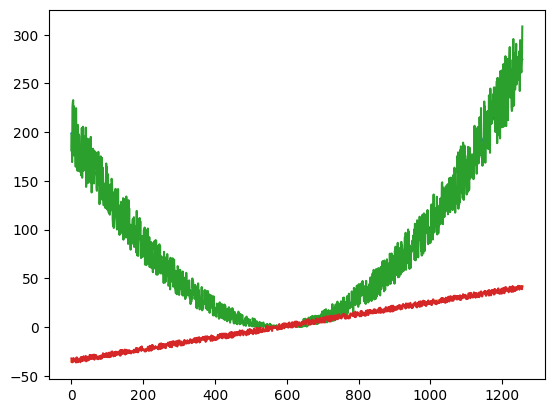

In [166]:
plt.plot(predictor)
plt.plot(outputvals)

In [167]:
predx = []
predy = []
for i,j in predictor:
    predx.append(i)
    predy.append(j)

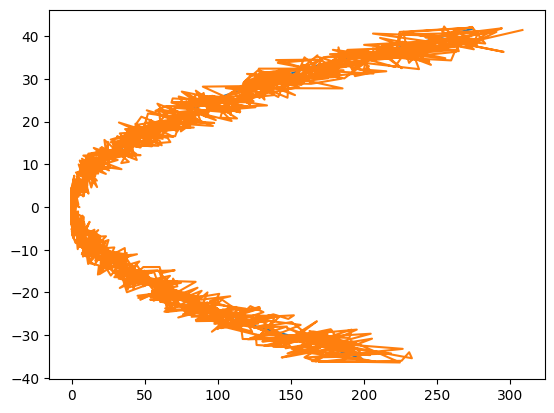

In [168]:
plt.plot(predx,predy)
plt.plot(outputvals.outputx,outputvals.outputy)